# Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import joblib

# Task 1: Data Handling

In [2]:
data_folder = "./data"  # current directory

all_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

df_list = []
# Load ALL CSV Files
for file in all_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

In [3]:
# Merging
air_quality_df = pd.concat(df_list, ignore_index=True)

In [4]:
air_quality_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Task 2: Exploratory Data Analysis (EDA

### Fundamental data understanding

In [5]:
air_quality_df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [6]:
air_quality_df.shape

(29531, 16)

In [7]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
# null values
air_quality_df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

### Data preprocessing

In [9]:
air_quality_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [10]:
# Convert Date Column
air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'], dayfirst=True)

In [11]:
# Remove Duplicate Records
air_quality_df = air_quality_df.drop_duplicates()

In [12]:
# Numeric columns
numeric_cols = air_quality_df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing numeric values with column median
air_quality_df[numeric_cols] = air_quality_df[numeric_cols].fillna(
    air_quality_df[numeric_cols].median()
)

In [13]:
# Categorical columns
categorical_cols = air_quality_df.select_dtypes(include=['object']).columns

# Fill missing categorical values with 'Unknown'
air_quality_df[categorical_cols] = air_quality_df[categorical_cols].fillna('Unknown')

In [14]:
# feature engineering
air_quality_df['Year'] = air_quality_df['Date'].dt.year
air_quality_df['Month'] = air_quality_df['Date'].dt.month

### Statistics/computation-based analysis and Visualisation

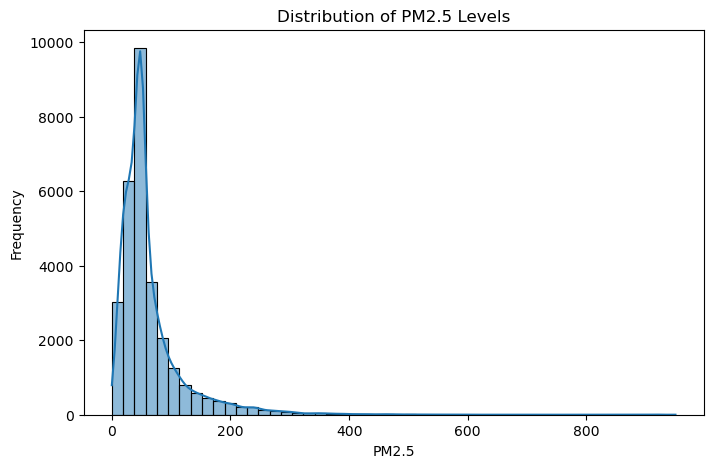

In [15]:
# PM2.5 Distribution
plt.figure(figsize=(8,5))
sns.histplot(air_quality_df['PM2.5'], bins=50, kde=True)
plt.title("Distribution of PM2.5 Levels")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

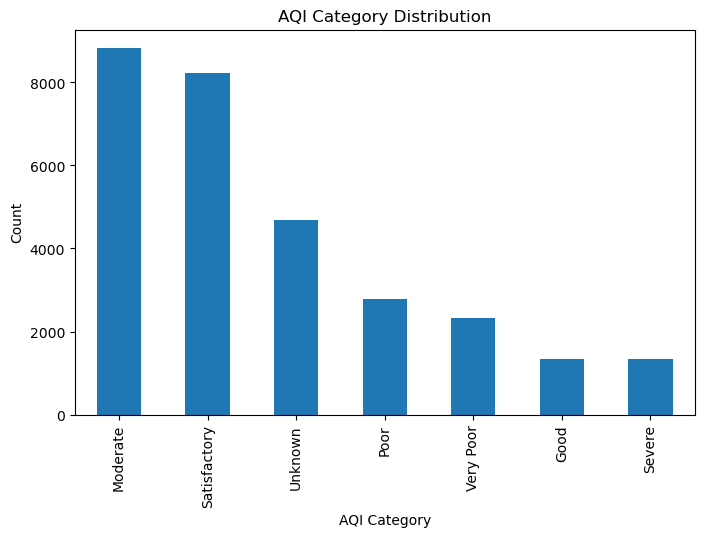

In [16]:
# AQI Category Counts
plt.figure(figsize=(8,5))
air_quality_df['AQI_Bucket'].value_counts().plot(kind='bar')
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

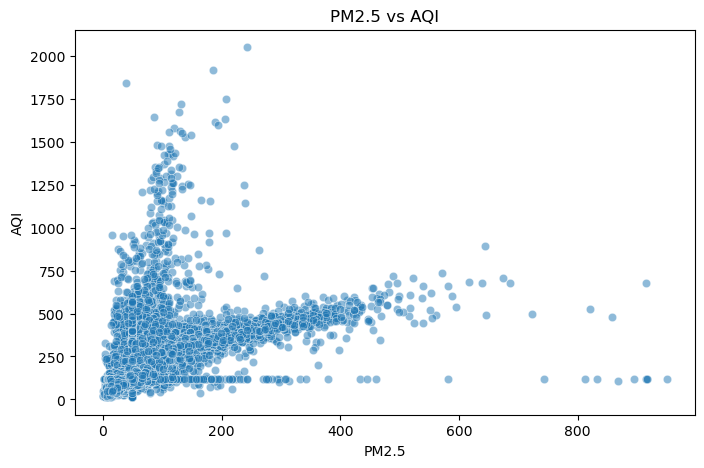

In [17]:
# PM2.5 vs AQI
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=air_quality_df,
    x='PM2.5',
    y='AQI',
    alpha=0.5
)
plt.title("PM2.5 vs AQI")
plt.show()

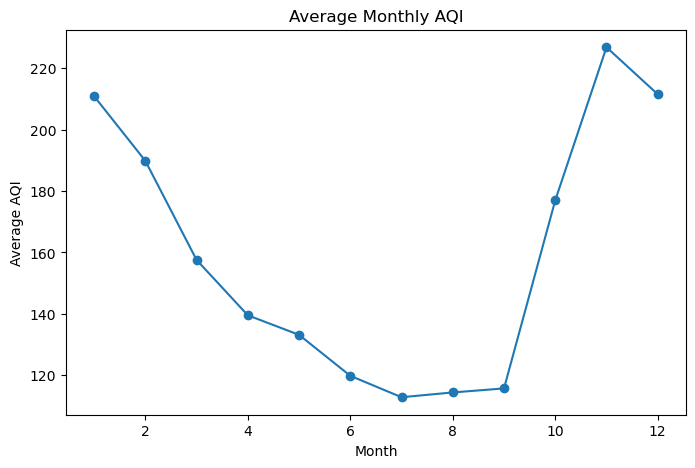

In [18]:
# Monthly AQI Trend
monthly_aqi = air_quality_df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(8,5))
monthly_aqi.plot(kind='line', marker='o')
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.show()

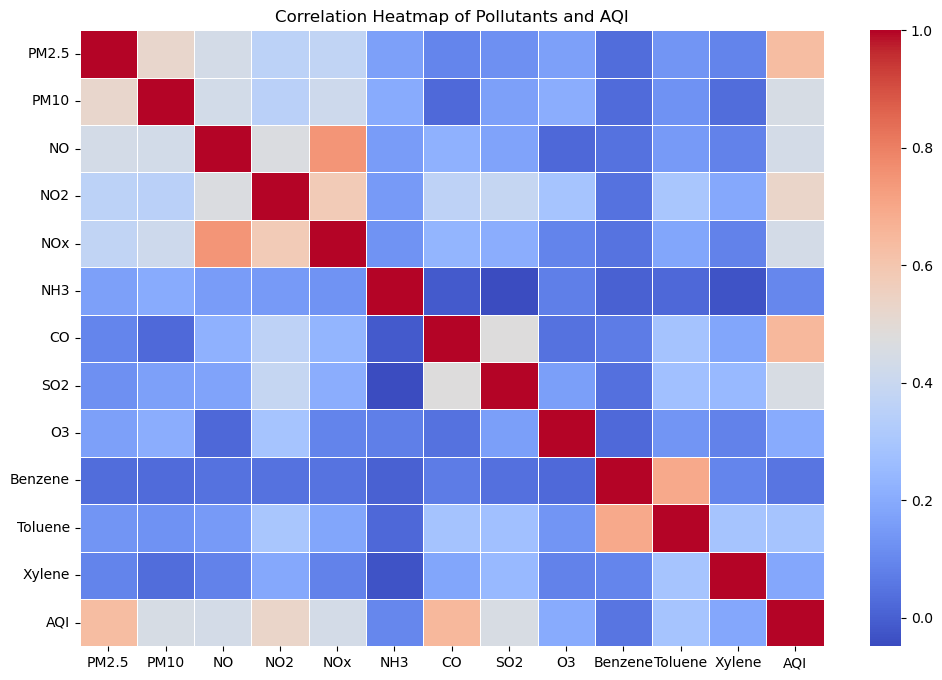

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = air_quality_df[numeric_cols].corr()

sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

# Task 3: Model Building

In [20]:
# Target variable
target = 'AQI'

In [21]:
# Feature selection
features = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene'
]

In [22]:
X = air_quality_df[features]
y = air_quality_df[target]

In [23]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tuning

In [25]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

In [26]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [27]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [28]:
# Random Forest Model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [29]:
# Prediction
y_pred = model.predict(X_test_scaled)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

Model Evaluation Metrics:
MAE  : 19.92
RMSE : 43.20
R²   : 0.88


In [31]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
0,PM2.5,0.463422
6,CO,0.351738
1,PM10,0.055850
2,NO,0.033272
3,NO2,0.017179
4,NOx,0.016948
8,O3,0.015784
7,SO2,0.015366
10,Toluene,0.011462
9,Benzene,0.007395


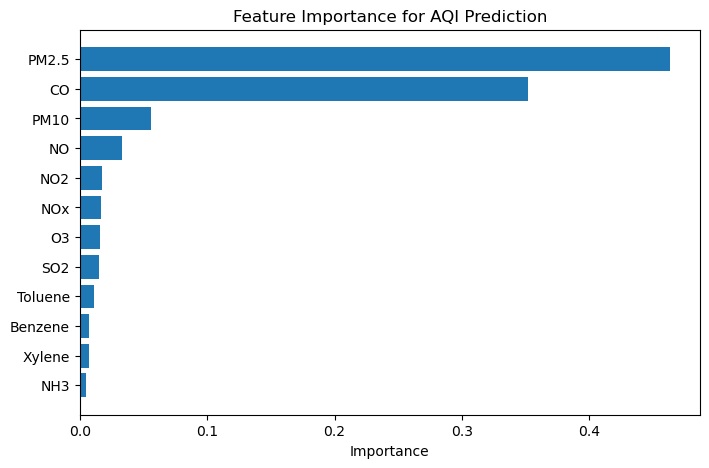

In [32]:
# Feature Importance Plot

plt.figure(figsize=(8,5))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Importance']
)
plt.gca().invert_yaxis()
plt.title("Feature Importance for AQI Prediction")
plt.xlabel("Importance")
plt.show()

# Saving pretrain models and tools

In [41]:
# save merged dataset
air_quality_df.to_csv('./gui_app/data.csv', index=False)

# Save trained model
joblib.dump(model, "./gui_app/models/aqi_model.pkl")

# Save scaler
joblib.dump(scaler, "./gui_app/models/scaler.pkl")

# save features name
joblib.dump(features, "./gui_app/models/features.pkl")

['./gui_app/models/features.pkl']

                                                                    END